In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
data = pd.read_csv('character-predictions.csv')
data.shape

(1946, 33)

In [3]:
data.columns

Index(['S.No', 'actual', 'pred', 'alive', 'plod', 'name', 'title', 'male',
       'culture', 'dateOfBirth', 'DateoFdeath', 'mother', 'father', 'heir',
       'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations',
       'isPopular', 'popularity', 'isAlive'],
      dtype='object')

In [4]:
data

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1
5,6,1,0,0.021,0.979,Tommen Baratheon,NaN,1,NaN,NaN,...,1.0,NaN,0,0,NaN,5,1,1,1.000000,1
6,7,0,0,0.014,0.986,Valarr Targaryen,Hand of the King,1,Valyrian,183.0,...,NaN,1.0,1,1,26.0,0,0,1,0.431438,0
7,8,0,0,0.036,0.964,Viserys I Targaryen,NaN,1,NaN,NaN,...,1.0,NaN,0,0,NaN,5,1,1,0.678930,0
8,9,0,1,0.724,0.276,Wilbert,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.006689,0
9,10,1,0,0.391,0.609,Wilbert Osgrey,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.020067,1


In [5]:
data['pred'].unique()

array([0, 1], dtype=int64)

In [6]:
data['isAlive'].unique()

array([0, 1], dtype=int64)

<h1>Data Preparation and Cleaning Phase:</h1>

In [7]:
#Deleting columns which would be of no help in predicting the target variable 'isAlive'
del data['S.No']
del data['name']
del data['title']
del data['dateOfBirth']
del data['DateoFdeath']
del data['mother']
del data['father']
del data['heir']
del data['spouse']

In [8]:
#This will give number of NaN values in every column.
data.isnull().sum(axis = 0)

actual                  0
pred                    0
alive                   0
plod                    0
male                    0
culture              1269
house                 427
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isAliveMother        1925
isAliveFather        1920
isAliveHeir          1923
isAliveSpouse        1670
isMarried               0
isNoble                 0
age                  1513
numDeadRelations        0
boolDeadRelations       0
isPopular               0
popularity              0
isAlive                 0
dtype: int64

In [9]:
data.isnull().sum(axis = 1).count()

1946

In [10]:
#Deleting columns that contains a lot number of nullvalues which be decrease the dataset to smallsize.
del data['culture']
del data['isAliveMother']
del data['isAliveFather']
del data['isAliveHeir']
del data['isAliveSpouse']
del data['age']

In [11]:
data.isnull().sum(axis = 0)

actual                 0
pred                   0
alive                  0
plod                   0
male                   0
house                427
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isMarried              0
isNoble                0
numDeadRelations       0
boolDeadRelations      0
isPopular              0
popularity             0
isAlive                0
dtype: int64

In [12]:
data['house'].unique()

array([nan, 'House Frey', 'House Swyft', 'House Arryn', 'House Santagar',
       'House Targaryen', 'House Osgrey', "Night's Watch", 'House Humble',
       'House Wylde', 'House Wode', 'House Fell',
       'Brotherhood Without Banners', 'House Webber', 'House Greyjoy',
       'House Stark', 'House Waynwood', 'House Dayne', 'House Manderly',
       'House Farwynd of the Lonely Light', 'Happy Port',
       'House of Loraq', 'Kingswood Brotherhood', 'House Botley',
       'Burned Men', 'House Velaryon', 'House Tallhart', 'House Tyrell',
       'House Blackwood', 'House Blackfyre', 'wildling',
       'Kingdom of the Three Daughters',
       'House Royce of the Gates of the Moon', 'House Nayland',
       "House Vance of Wayfarer's Rest", 'House Rowan', 'House Farrow',
       'House Lonmouth', 'House Reyne', 'House Ashford', 'House Brax',
       'House Paege', 'House Hollard', 'House Tarth', 'House Ryswell',
       'House Lannister', 'House Crakehall', 'House Darklyn',
       'House Westerli

In [13]:
ho=['House Frey', 'House Swyft', 'House Arryn', 'House Santagar',
       'House Targaryen', 'House Osgrey', "Night's Watch", 'House Humble',
       'House Wylde', 'House Wode', 'House Fell',
       'Brotherhood Without Banners', 'House Webber', 'House Greyjoy',
       'House Stark', 'House Waynwood', 'House Dayne', 'House Manderly',
       'House Farwynd of the Lonely Light', 'Happy Port',
       'House of Loraq', 'Kingswood Brotherhood', 'House Botley',
       'Burned Men', 'House Velaryon', 'House Tallhart', 'House Tyrell',
       'House Blackwood', 'House Blackfyre', 'wildling',
       'Kingdom of the Three Daughters',
       'House Royce of the Gates of the Moon', 'House Nayland',
       "House Vance of Wayfarer's Rest", 'House Rowan', 'House Farrow',
       'House Lonmouth', 'House Reyne', 'House Ashford', 'House Brax',
       'House Paege', 'House Hollard', 'House Tarth', 'House Ryswell',
       'House Lannister', 'House Crakehall', 'House Darklyn',
       'House Westerling', 'House Weaver', 'House Connington',
       'House Stout', 'House Harclay', 'House Drumm',
       'House Lannister of Lannisport', 'House Crabb', 'Drowned men',
       'Stormcrows', 'Antler Men', 'House Spicer', 'House Staunton',
       'House Stonetree', 'House Leygood', 'House Bolton', 'House Sparr',
       'House Fossoway of Cider Hall', 'House Varner', 'House Tarly',
       'Peach', 'House Lynderly', 'House Ironmaker', 'House Martell',
       'House Clegane', 'House Costayne', 'House Heddle', 'Stone Crows',
       'House Ryger', 'Sea watch', 'Second Sons', 'Moon Brothers',
       'House Baelish', 'Faceless Men', 'Brave Companions',
       'House Frey of Riverrun', 'House Stokeworth', 'House Hightower',
       'Band of Nine', 'House Oakheart', 'House Sharp', 'House Hunt',
       'House Bracken', 'House Whent', 'House Dalt', 'House Charlton',
       'House Butterwell', 'House Qorgyle', 'House Ambrose',
       "Alchemists' Guild", 'House Bushy', 'House Blacktyde',
       'House Beesbury', 'House Baratheon', 'House Bulwer',
       'House Cafferen', 'House Smallwood', 'House Payne',
       'House Buckler', 'House Tully', 'Black Ears', 'House Caswell',
       'House Conklyn', 'House Greenhill', 'House Karstark',
       'House Redfort', 'House Baratheon of Dragonstone',
       'House Deddings', 'House Slynt', 'House Plumm', 'House Redwyne',
       'House Manwoody', 'House Harlaw', 'House Risley',
       'Faith of the Seven', 'Pureborn', 'House Codd', 'House Willum',
       'House of Galare', "R'hllor", 'House Morrigen', 'House Corbray',
       'House Gaunt', 'House Goodbrother', 'Kingsguard', 'House Grafton',
       'House Hornwood', 'House Grandison', 'House Sawyer',
       'House Uffering', 'House Bolling', 'House Clifton',
       'House Blackberry', "Chataya's brothel", 'House Norcross',
       'House Mallister', 'House Fossoway of New Barrel', 'House Swann',
       'House Cupps', 'House Penny', 'House Penrose', 'House Umber',
       'House Vance of Atranta', 'Brotherhood without banners',
       'House Royce', 'House Tawney', 'Windblown', 'House Piper',
       'House Serry', 'House Lorch', 'House Lefford', 'House Strong',
       'House Roote', 'House Hardy', 'Queensguard', 'House Meadows',
       'House Dondarrion', 'House Lothston', 'House Yew',
       'House Mullendore', 'House Florent', 'House Mertyns',
       'House Boggs', 'House Woods', 'House Inchfield', 'House Blackmont',
       'House Pemford', 'House Kenning of Harlaw', 'House Shepherd',
       'House Estermont', 'House Wynch', 'House Staedmon',
       'House Seaworth', "City Watch of King's Landing", 'House Cockshaw',
       'House Graceford', 'House Stackspear', 'House Haigh', 'House Jast',
       'House Farring', 'House Celtigar', 'House of Ghazeen',
       'House Byrch', 'House Hawick', 'House Belmore', 'House Broom',
       'House Brune of Brownhollow', 'House Cassel', 'House Rosby',
       'House Harlaw of Harridan Hill', 'House Cuy', 'House Caron',
       'House Cerwyn', 'House Vaith', 'House Vance',
       'House Shett of Gull Tower', 'House Vypren', 'House Marbrand',
       'House Hardyng', 'House Allyrion', 'House Locke',
       'House Bar Emmon', 'House Mooton', 'House Norridge',
       'House Hunter', 'House Hayford', 'House Glover',
       'House Brune of the Dyre Den', 'House Prester', 'House Fowler',
       'House Goodbrook', 'House Greenfield', 'House Gower', 'Blacks',
       'House Hewett', 'House Borrell', 'House Peake', 'Citadel',
       'Wise Masters', 'Good Masters', 'House Sunglass', 'House Grimm',
       'The Citadel', 'House Mollen', 'House Hoare', 'House Rambton',
       'House Harlaw of the Tower of Glimmering', 'House Wull',
       'House Wagstaff', 'House Vyrwel', 'House Darry', 'House Lydden',
       'House Bettley', 'House Myre', 'House Mormont', 'House Reed',
       'House Kenning of Kayce', 'House of Pahl', 'House Turnberry',
       'House Blackbar', 'House Woolfield', 'House Fossoway',
       'House Mallery', 'House Chyttering',
       "House Flint of Widow's Watch", 'House Lychester', 'House Vikary',
       'House Selmy', 'House Volmark', 'House Merlyn', 'House Crane',
       'House Sarsfield', 'House of Merreq', 'House Chester',
       'House Jordayne', 'Iron Bank of Braavos',
       'House Goodbrother of Shatterstone', 'House Toland',
       "House Baratheon of King's Landing", 'House Yronwood',
       'House Kettleblack', 'House Wythers', 'House Norrey',
       'House Foote', 'House Chelsted', 'House Banefort', 'House Ball',
       'House Cox', 'House Ruttiger', 'House Estren', 'House Rykker',
       'House Longwaters', 'House Thorne', 'House Moreland',
       'House Flint', 'House Hogg', 'House Longthorpe', 'House Coldwater',
       'House Leek', 'House Farman', 'House Harlaw of Harlaw Hall',
       'House Templeton', 'House Wells', 'House Toyne', 'House Liddle',
       'House Gargalen', 'House Mudd', 'House Farwynd',
       'House Sunderland', 'House Hetherspoon', 'House Uller',
       'House Wayn', 'House Tollett', 'House Poole', 'Maesters',
       'House Blanetree', 'House Blount', 'Golden Company',
       'Company of the Cat', 'House Suggs', 'Khal',
       'House Nymeros Martell', 'House Drinkwater',
       'House Harlaw of Grey Garden', 'Summer Islands', 'House Condon',
       'House Lannister of Casterly Rock', 'House Moore', 'House Trant',
       'House Yarwyck', 'Undying Ones', 'House Stonehouse',
       'House Bolton of the Dreadfort', 'Thenn', 'House Hasty',
       'House Cole', 'Graces', 'House Tyrell of Brightwater Keep',
       'House Dayne of High Hermitage', 'Unsullied', 'House Strickland',
       'House Bywater', 'House Massey', 'Brotherhood without Banners',
       'House Rhysling', 'House Potter', 'House Horpe', 'House of Kandaq',
       'House of Reznak', 'House Peckledon', 'House Dustin',
       'Mance Rayder', 'House Egen', 'House Merryweather', 'House Errol',
       'Thirteen', 'House Erenford', 'House Grell',
       'brotherhood without banners', 'Three-eyed crow']

In [14]:
pro=[]
proho=[]
coun=[]
death=[]

In [15]:
#Deleting rows with null  values
data=data.dropna()

In [16]:
for i in ho:
    coun.append(len(data[data['house']==i]))
    if(len(data[data['house']==i])>=10):
        pro.append(len(data[data['house']==i]))
        proho.append(i)
        print(i,"=",len(data[data['house']==i]))

House Frey = 97
House Arryn = 16
House Targaryen = 62
House Osgrey = 21
Night's Watch = 105
House Greyjoy = 41
House Stark = 72
House Botley = 13
House Velaryon = 11
House Tyrell = 36
House Lannister = 49
House Crakehall = 10
House Bolton = 13
House Martell = 29
Brave Companions = 12
House Hightower = 16
House Bracken = 14
House Whent = 11
House Baratheon = 13
House Tully = 12
Faith of the Seven = 17
Brotherhood without banners = 11
House Florent = 13


In [17]:
keydict = dict(zip(proho, pro))
proho.sort(key=keydict.get)

In [18]:
keydict = dict(zip(ho, coun))
ho.sort(key=keydict.get)

In [19]:
pro=[]
coun=[]

In [20]:
for i in proho:
        pro.append(len(data[data['house']==i]))

In [21]:
for i in ho:
        coun.append(len(data[data['house']==i]))

In [22]:
for i in ho:
    c=0
    for ind in data.index:
        if(data['isAlive'][ind]==0 and data['house'][ind]==i):
            c+=1
    death.append(c)

In [23]:
rank=[]
for i in range(0,len(ho)):
    rank.append(death[i]/coun[i])

In [24]:
keydict = dict(zip(ho,rank))

In [25]:
keydict['Three-eyed crow']

0.0

In [26]:
list2=[]
for ind in data.index:
    list2.append(keydict[data['house'][ind]])
data=data.assign(nrank=list2)
#data['nrank']=list2
#data.to_csv('character-predictions.csv', index=False)

In [27]:
len(proho)

23

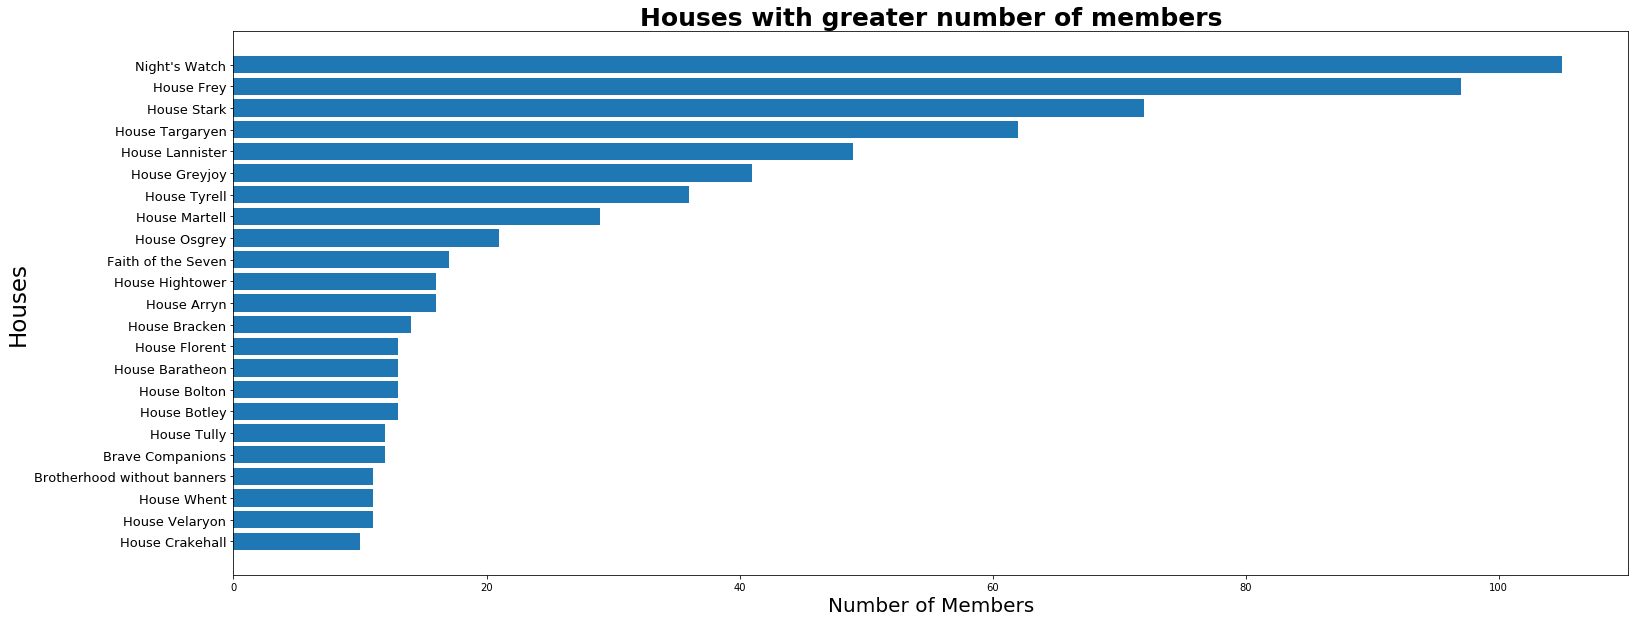

In [28]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10
index = np.arange(len(pro))
plt.barh(index, pro)
plt.ylabel('Houses', fontsize=23)
plt.xlabel('Number of Members', fontsize=20)
plt.yticks(index, proho, fontsize=13)
plt.title('Houses with greater number of members',fontweight='bold',fontsize=25);
plt.show()

In [29]:
c=0
for i in ho:
    c+=len(data[data['house']==i])
print(c)

1519


In [30]:
data.isnull().sum(axis = 0)

actual               0
pred                 0
alive                0
plod                 0
male                 0
house                0
book1                0
book2                0
book3                0
book4                0
book5                0
isMarried            0
isNoble              0
numDeadRelations     0
boolDeadRelations    0
isPopular            0
popularity           0
isAlive              0
nrank                0
dtype: int64

<h1>Data Analysis Phase:</h1>

In [31]:
#Finding Correlation of various columns with target variable 'isAlive'
data['isAlive'].corr(data['actual'])

0.9966063449508489

<h5>Note the extraordinary correlation between 'actual' and 'isAlive' columns<h5>

In [32]:
data['isAlive'].corr(data['book4'])

0.2913182143445629

In [33]:
data['isAlive'].corr(data['nrank'])

-0.5407577359068608

In [34]:
data['isAlive'].corr(data['alive'])

0.3987029544970316

In [35]:
data['isAlive'].corr(data['pred'])

0.3383862190034684

In [36]:
data['isAlive'].corr(data['plod'])

-0.3987029544970316

In [37]:
data['isAlive'].corr(data['male'])

-0.13699798596736565

In [38]:
data['isAlive'].corr(data['book1'])

-0.14841950098158818

In [39]:
data['isAlive'].corr(data['book2'])

-0.053686371426137004

In [40]:
data['isAlive'].corr(data['book3'])

0.013175942638259924

In [41]:
data['isAlive'].corr(data['book5'])

0.08180058034313704

In [42]:
data['isAlive'].corr(data['isMarried'])

-0.05767604601926926

In [43]:
data['isAlive'].corr(data['isNoble'])

-0.06710791676461063

In [44]:
data['isAlive'].corr(data['numDeadRelations'])

-0.14254266994147938

In [45]:
data['isAlive'].corr(data['boolDeadRelations'])

-0.1629162762631993

In [46]:
data['isAlive'].corr(data['popularity'])

-0.1184881409821493

In [47]:
data['isAlive'].corr(data['isPopular'])

-0.09706805643704286

In [48]:
data.columns

Index(['actual', 'pred', 'alive', 'plod', 'male', 'house', 'book1', 'book2',
       'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'numDeadRelations',
       'boolDeadRelations', 'isPopular', 'popularity', 'isAlive', 'nrank'],
      dtype='object')

<p>

Declaring Columns which are to be Used as Features
</p>

In [49]:
features=['actual','pred', 'alive', 'plod', 'male', 'book1', 'book2',
       'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'numDeadRelations',
       'boolDeadRelations', 'isPopular', 'popularity','nrank']
m=[]

In [50]:
for i in features:
    m.append(data['isAlive'].corr(data[i]))

<h2>Data Visualization</h2>

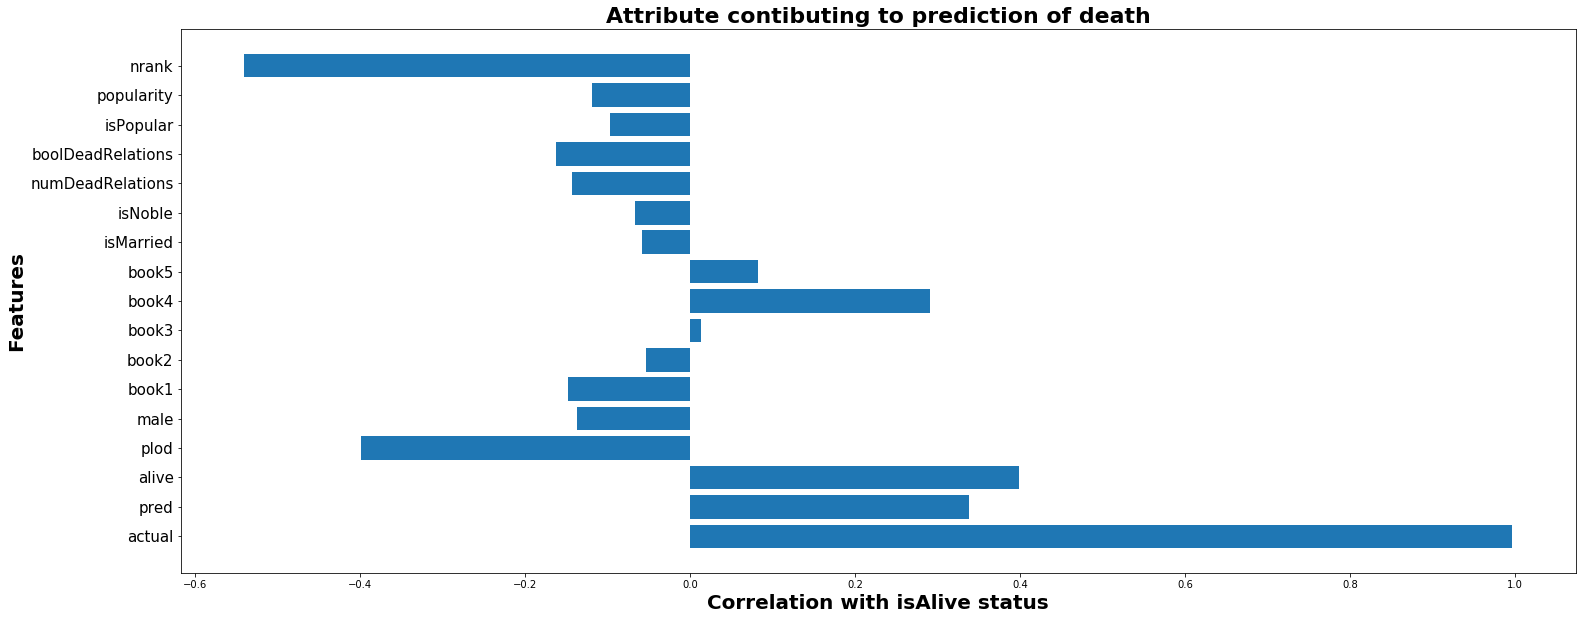

In [51]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10
index = np.arange(len(features))
plt.barh(index, m)
plt.ylabel('Features', fontsize=20,fontweight='bold')
plt.xlabel('Correlation with isAlive status', fontsize=20,fontweight='bold')
plt.yticks(index, features, fontsize=15)
plt.title('Attribute contibuting to prediction of death',fontweight='bold',fontsize=22)
plt.show()

<h1>Data Analysis to predict target value using Regression Models</h1>

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Specifying the Prediction Target
<br><br></p>


In [52]:
target = ['isAlive']

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Extracting Features and Target ('isAlive') Values into Separate Dataframes
<br><br></p>


In [53]:
X = data[features]

In [54]:
y = data[target]

In [55]:
X.iloc[2]

actual               0.000000
pred                 0.000000
alive                0.076000
plod                 0.924000
male                 0.000000
book1                0.000000
book2                0.000000
book3                0.000000
book4                0.000000
book5                0.000000
isMarried            1.000000
isNoble              1.000000
numDeadRelations     0.000000
boolDeadRelations    0.000000
isPopular            0.000000
popularity           0.183946
nrank                0.375000
Name: 3, dtype: float64

In [56]:
y

,isAlive
1,1
2,1
3,0
4,1
6,0
9,1
10,0
13,1
14,1
15,1


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Extracting Features and Target ('overall_rating') Values into Separate Dataframes
<br><br></p>


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

<h5>

Linear Regression: Fitting a model to the training set
</h5>


In [58]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Performing Prediction using Linear Regression Model
<br><br></p>


In [59]:
y_prediction = regressor.predict(X_test)
y_prediction

array([[ 9.91807606e-01],
       [ 1.00165476e+00],
       [ 2.88166626e-03],
       [ 9.99263623e-01],
       [ 1.00126624e+00],
       [ 9.95953157e-01],
       [ 1.00813689e+00],
       [ 9.86073270e-01],
       [ 9.94374107e-01],
       [ 1.00111190e+00],
       [-2.27406600e-03],
       [ 1.00818839e+00],
       [ 9.88916167e-01],
       [ 9.92150531e-01],
       [ 1.00263065e+00],
       [ 1.00099441e+00],
       [ 1.00196107e+00],
       [ 1.00265923e+00],
       [ 1.00878784e+00],
       [ 1.00535182e+00],
       [ 1.00577583e+00],
       [ 9.93596571e-01],
       [ 9.93187442e-01],
       [-2.90117658e-03],
       [ 9.99151539e-01],
       [ 9.88629117e-01],
       [ 9.94777896e-01],
       [ 9.94617817e-01],
       [ 7.44021676e-03],
       [ 9.97189433e-01],
       [ 5.17920116e-05],
       [ 9.93604737e-01],
       [ 1.00227101e+00],
       [ 1.00081552e+00],
       [ 9.95264394e-01],
       [ 1.00628723e+00],
       [ 1.00261651e+00],
       [ 9.97333496e-01],
       [ 9.9

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

What is the mean of the expected target value in test set ?
<br><br></p>


In [60]:
y_test.describe()

,isAlive
count,502.000000
mean,0.749004
std,0.434019
min,0.000000
25%,0.250000
50%,1.000000
75%,1.000000
max,1.000000


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Evaluating Linear Regression Accuracy using Root Mean Square Error

<br><br></p>

In [61]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [62]:
print(RMSE)

0.00564167491606995


<h5>

Decision Tree Regressor: Fitting a new regression model to the training set
</h5>

In [63]:
regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

<p>
    
Performing Prediction using Decision Tree Regressor

</p>


In [64]:
y_prediction = regressor.predict(X_test)
y_prediction

array([1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1.

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

For comparision: What is the mean of the expected target value in test set ?
<br><br></p>

In [65]:
y_test.describe()

,isAlive
count,502.000000
mean,0.749004
std,0.434019
min,0.000000
25%,0.250000
50%,1.000000
75%,1.000000
max,1.000000


In [66]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [67]:
print(RMSE)

0.0


<h1>Findind results without using actual column because of very high correlation</h1>

In [68]:
features=['alive', 'plod', 'male', 'book1', 'book2',
       'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'numDeadRelations',
       'boolDeadRelations', 'isPopular', 'popularity']

In [69]:
X = data[features]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

<h5>
Linear Regression: Fitting a model to the training set
</h5>

In [71]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
y_prediction = regressor.predict(X_test)
y_prediction

array([[0.79681997],
       [0.73313088],
       [0.40850793],
       [0.65435515],
       [0.82347647],
       [0.64187971],
       [0.91163788],
       [0.77281962],
       [0.76175844],
       [0.86255235],
       [1.03991811],
       [0.43177695],
       [0.80686609],
       [0.95527705],
       [0.88567531],
       [1.02703361],
       [1.10434824],
       [0.70360069],
       [0.89891535],
       [0.70688037],
       [1.02786259],
       [0.86799241],
       [0.90331952],
       [0.69004702],
       [0.81778818],
       [0.87998891],
       [0.96754657],
       [0.94172819],
       [0.42426465],
       [0.90774862],
       [0.22569485],
       [0.77729583],
       [1.10022028],
       [0.36762239],
       [0.91367964],
       [1.03543411],
       [0.6958674 ],
       [0.68238385],
       [0.60269022],
       [0.43876829],
       [0.30070861],
       [0.63050854],
       [0.68580852],
       [1.0506437 ],
       [0.34462934],
       [0.76275196],
       [0.76003719],
       [0.777

In [73]:
y_test.describe()

,isAlive
count,502.000000
mean,0.749004
std,0.434019
min,0.000000
25%,0.250000
50%,1.000000
75%,1.000000
max,1.000000


In [74]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [75]:
print(RMSE)

0.40168202561094757


<h5>

Decision Tree Regressor: Fitting a new regression model to the training set
</h5>

In [76]:
regressor = DecisionTreeRegressor(max_depth=100)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=100, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [77]:
y_test.describe()

,isAlive
count,502.000000
mean,0.749004
std,0.434019
min,0.000000
25%,0.250000
50%,1.000000
75%,1.000000
max,1.000000


In [78]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [79]:
print(RMSE)

0.40168202561094757
